Nama        : Sheila Edistya Salsabilla

NIM         : 23031554056

MataKuliah  : Pembelajaran Mesin Dasar

Kelas       : 2023 E

Tugas       : Pertemuan 2

# Akses Dataset

In [1]:
import pandas as pd

# load dataset
df = pd.read_csv('SuperStore_Sales_Dataset.csv')

In [2]:
# Menampilkan informasi umum tentang dataset
print("Informasi Dataset:")
df.info()

# Menampilkan beberapa baris pertama
df.head()

# Menampilkan ringkasan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
df.describe()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 

,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,ind1,ind2
count,5901.000000,5901.000000,5901.000000,5901.000000,287.0,0.0,0.0
mean,5022.422471,265.345589,3.781901,29.700408,1.0,NaN,NaN
std,2877.977184,474.260645,2.212917,259.589138,0.0,NaN,NaN
min,1.000000,0.836000,1.000000,-6599.978000,1.0,NaN,NaN
25%,2486.000000,71.976000,2.000000,1.795500,1.0,NaN,NaN
50%,5091.000000,128.648000,3.000000,8.502500,1.0,NaN,NaN
75%,7456.000000,265.170000,5.000000,28.615000,1.0,NaN,NaN
max,9994.000000,9099.930000,14.000000,8399.976000,1.0,NaN,NaN


# Prepocessing Data

Kode ini bertujuan untuk membersihkan dan mempersiapkan data sebelum analisis. Dimulai dengan menghapus kolom yang tidak diperlukan, menangani nilai kosong, serta mengonversi kolom tanggal agar bisa digunakan untuk fitur tambahan seperti tahun, bulan, dan durasi pengiriman. Variabel kategorikal dikonversi ke bentuk numerik dengan one-hot encoding. Setelah semua proses selesai, kode ini menampilkan statistik deskriptif, visualisasi korelasi, dan ukuran dataset final untuk memastikan data siap digunakan.


RANGKUMAN PROSES PEMBERSIHAN DATA
Total data kosong yang dihilangkan: 0
Jumlah data outlier yang diidentifikasi dan dihapus: 1548


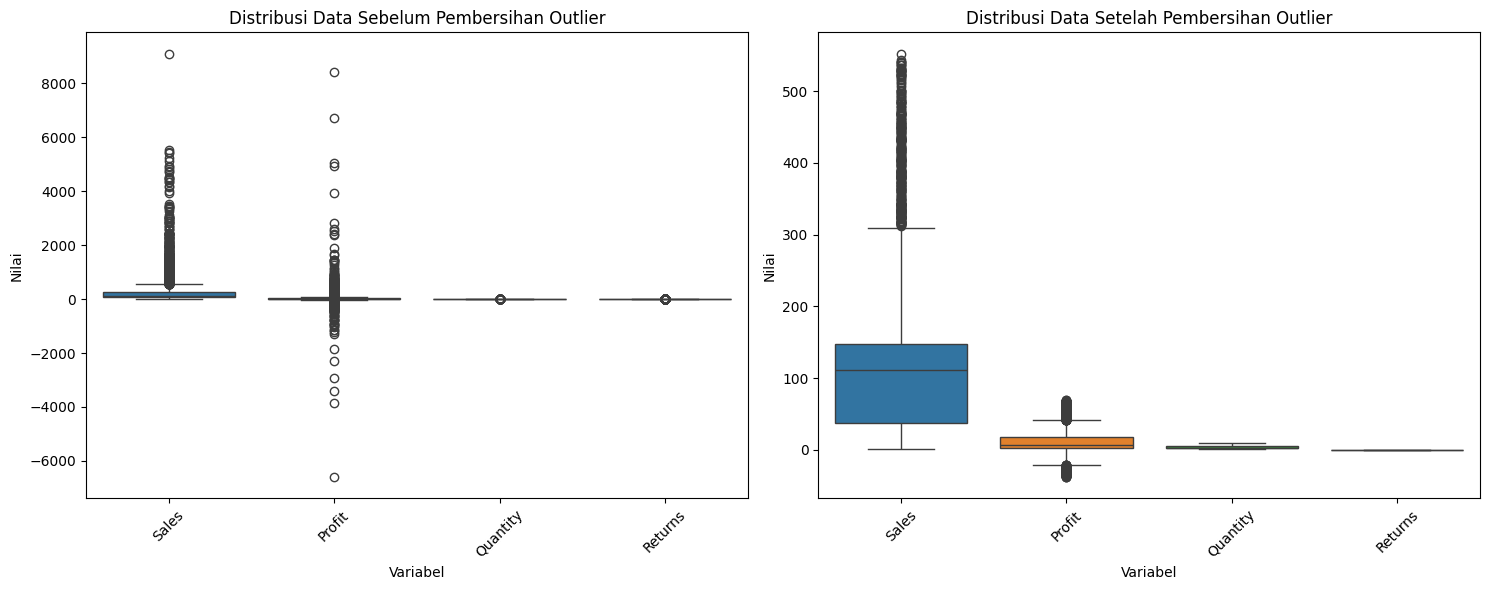

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21996\2770142925.py:82: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_cleaned, x=col, ax=axes[i//2, i%2], fill=True)


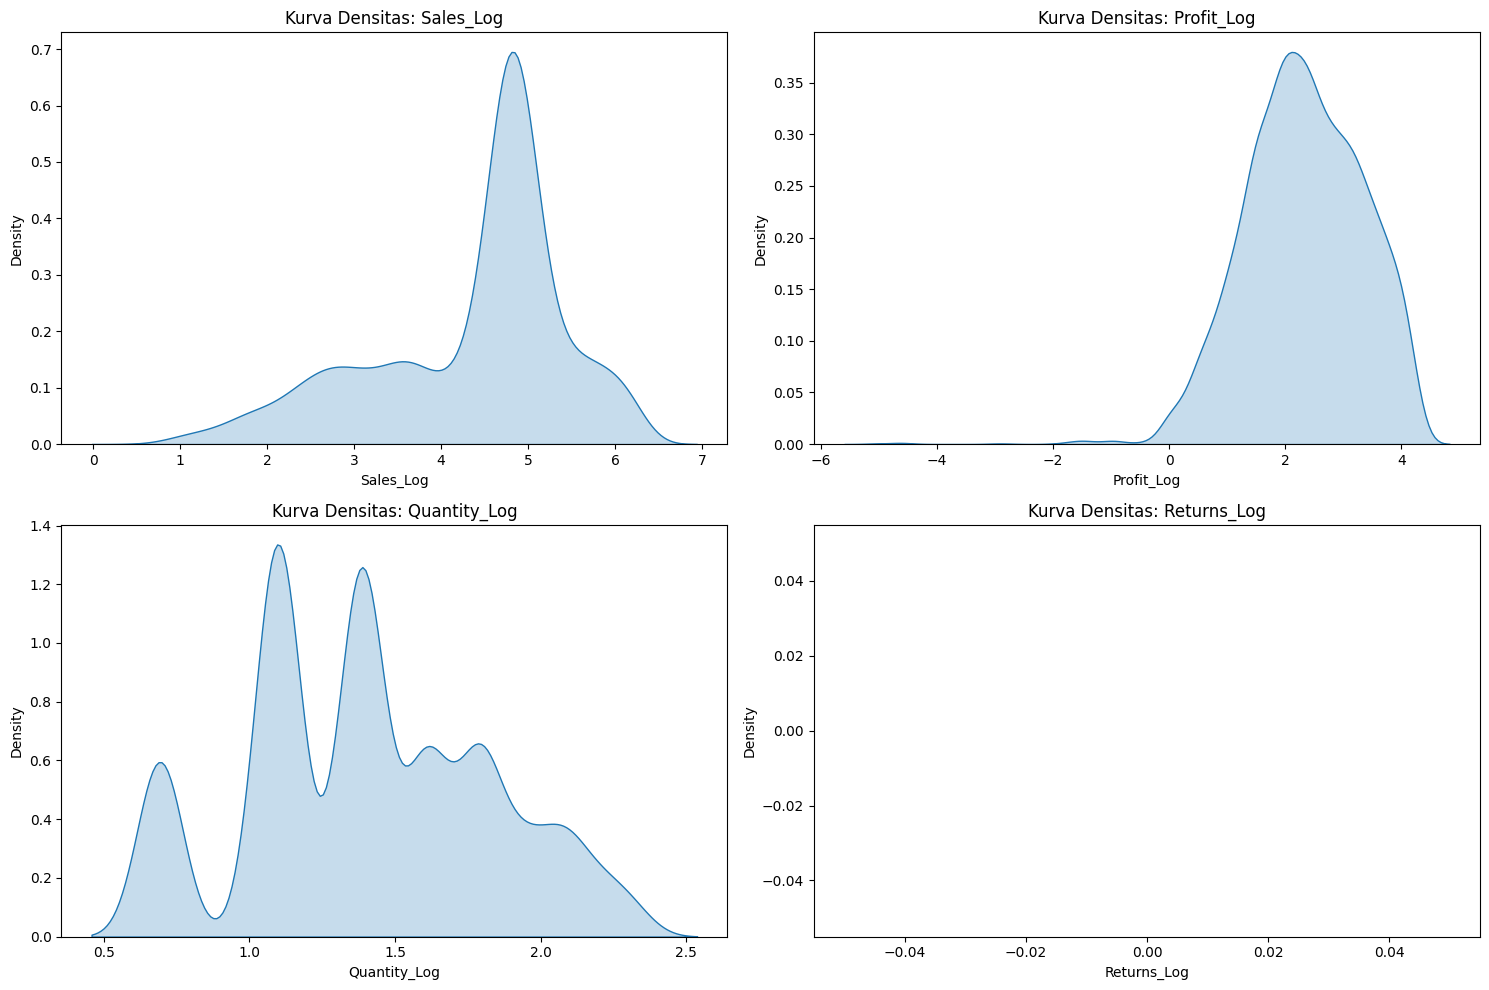


HASIL AKHIR PREPROCESSING DATA

Rincian Struktur Data:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 4353 entries, 0 to 5899
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales_Log                 4353 non-null   float64
 1   Profit_Log                3700 non-null   float64
 2   Quantity_Log              4353 non-null   float64
 3   Returns_Log               4353 non-null   float64
 4   Shipping Duration         4353 non-null   int64  
 5   Profit Margin             4353 non-null   float64
 6   Is Weekend                4353 non-null   int32  
 7   Category_Office Supplies  4353 non-null   bool   
 8   Category_Technology       4353 non-null   bool   
 9   Sub-Category_Appliances   4353 non-null   bool   
 10  Sub-Category_Art          4353 non-null   bool   
 11  Sub-Category_Binders      4353 non-null   bool   
 12  Sub-Category_Bookcases    4353 non-n

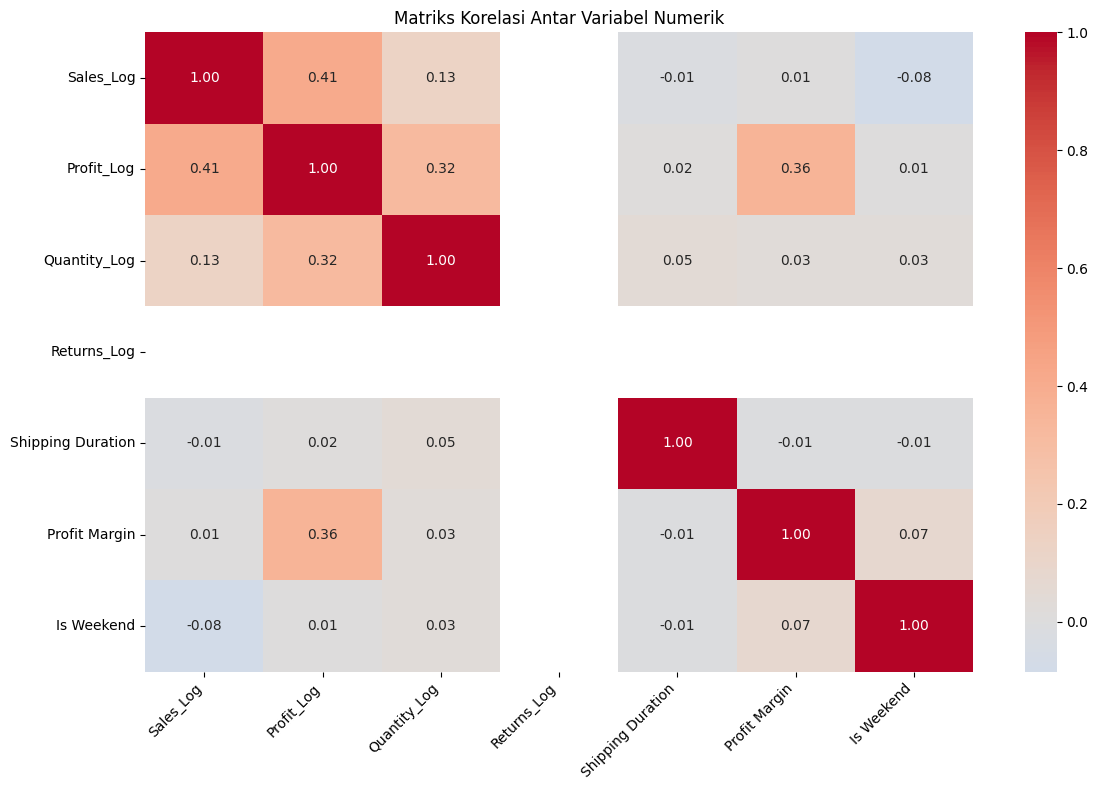


Ukuran Dataset Final: 4353 observasi dengan 33 variabel


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi dataset
df_cleaned = df.copy()

# Pembersihan Data Awal
df_cleaned = df_cleaned.drop(columns=['ind1', 'ind2'], errors='ignore')
df_cleaned['Returns'] = df_cleaned['Returns'].fillna(0)

# Transformasi Data Tanggal
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], format='%d-%m-%Y')

# Pembuatan Fitur Temporal
df_cleaned['Order Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order Quarter'] = df_cleaned['Order Date'].dt.quarter
df_cleaned['Order Day'] = df_cleaned['Order Date'].dt.day
df_cleaned['Order Weekday'] = df_cleaned['Order Date'].dt.dayofweek
df_cleaned['Is Weekend'] = df_cleaned['Order Weekday'].isin([5, 6]).astype(int)
df_cleaned['Shipping Duration'] = (df_cleaned['Ship Date'] - df_cleaned['Order Date']).dt.days

# Kalkulasi Metrik Bisnis
df_cleaned['Profit Margin'] = (df_cleaned['Profit'] / df_cleaned['Sales']) * 100

# Penanganan Missing Value
missing_before = df_cleaned.isnull().sum().sum()
df_cleaned = df_cleaned.dropna()
missing_after = df_cleaned.isnull().sum().sum()
print("\n" + "="*50)
print("RANGKUMAN PROSES PEMBERSIHAN DATA")
print("="*50)
print(f"Total data kosong yang dihilangkan: {missing_before - missing_after}")

# Analisis Distribusi Data Awal
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Returns']

# Visualisasi sebelum pembersihan outlier
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned[numeric_cols]) 
plt.title("Distribusi Data Sebelum Pembersihan Outlier")
plt.xticks(rotation=45)
plt.ylabel("Nilai")
plt.xlabel("Variabel")

# Deteksi dan Penanganan Outlier
Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rows_before = len(df_cleaned)
df_cleaned = df_cleaned[~((df_cleaned[numeric_cols] < lower_bound) |
                         (df_cleaned[numeric_cols] > upper_bound)).any(axis=1)]
rows_removed = rows_before - len(df_cleaned)
print(f"Jumlah data outlier yang diidentifikasi dan dihapus: {rows_removed}")

# Visualisasi setelah pembersihan outlier
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title("Distribusi Data Setelah Pembersihan Outlier")
plt.xticks(rotation=45)
plt.ylabel("Nilai")
plt.xlabel("Variabel")
plt.tight_layout()
plt.show()

# Transformasi Log untuk Normalisasi
for col in numeric_cols:
    df_cleaned[f'{col}_Log'] = np.log1p(df_cleaned[col])

# Visualisasi hasil transformasi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate([f'{col}_Log' for col in numeric_cols]):
    sns.kdeplot(data=df_cleaned, x=col, ax=axes[i//2, i%2], fill=True)
    axes[i//2, i%2].set_title(f'Kurva Densitas: {col}')
plt.tight_layout()
plt.show()

# Pengkodean Variabel Kategorikal
categorical_cols = ['Category', 'Sub-Category', 'Ship Mode', 'Region', 'Payment Mode']
df_encoded = pd.get_dummies(df_cleaned[categorical_cols], drop_first=True)

# Penggabungan Dataset Final
numeric_features = [f'{col}_Log' for col in numeric_cols] + ['Shipping Duration', 'Profit Margin', 'Is Weekend']
df_final = pd.concat([df_cleaned[numeric_features], df_encoded], axis=1)

# Pelaporan Hasil Preprocessing
print("\n" + "="*50)
print("HASIL AKHIR PREPROCESSING DATA")
print("="*50)
print("\nRincian Struktur Data:")
print("-"*30)
info_str = df_final.info(buf=None, max_cols=None, show_counts=None)

# Analisis Statistik Deskriptif
print("\nMetrik Statistik Dasar:")
print("-"*30)
stats_df = df_final.describe().round(2)
print(stats_df.to_string())

# Analisis Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_final[numeric_features].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Informasi Dimensi Dataset
print("\n" + "="*50)
print(f"Ukuran Dataset Final: {df_final.shape[0]} observasi dengan {df_final.shape[1]} variabel")
print("="*50)


Mengevaluasi menggunakan Random Forest

Evaluasi Model:
Mean Squared Error (MSE): 102307.24
R² Score: 0.85


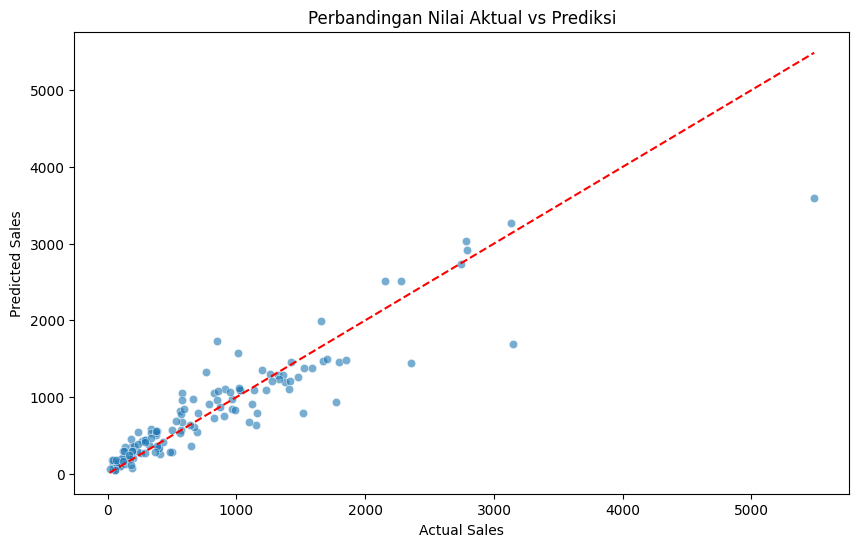

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Mengkonversi dan mengelompokkan data penjualan harian untuk analisis tren
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
daily_sales = df_cleaned.groupby('Order Date').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Returns': 'sum'
}).reset_index()

# Extract Time-Based Features
df_daily = daily_sales.copy()
df_daily['Day'] = df_daily['Order Date'].dt.day
df_daily['Month'] = df_daily['Order Date'].dt.month
df_daily['Year'] = df_daily['Order Date'].dt.year

# Transformasi fitur kategorikal menggunakan one-hot encoding
df_encoded = pd.get_dummies(
    df_cleaned[['Category', 'Sub-Category', 'Ship Mode', 'Region', 'Payment Mode']],
    drop_first=True
)
df_encoded = df_encoded.groupby(df_cleaned['Order Date']).mean().reset_index()

# Menggabungkan semua fitur untuk membentuk dataset final
df_final = df_daily.merge(df_encoded, on='Order Date', how='left')

# Memisahkan variabel prediktor dan target
X = df_final.drop(columns=['Sales', 'Order Date'])
y = df_final['Sales']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.show()


Hasil evaluasi menunjukkan bahwa model Random Forest Regressor memiliki Mean Squared Error (MSE) yang mencerminkan rata-rata kesalahan kuadrat dalam prediksi, serta R² Score yang mengukur seberapa baik model menjelaskan variabilitas data penjualan. Jika R² mendekati 1, model mampu memprediksi dengan baik, sedangkan nilai yang rendah menunjukkan bahwa model masih perlu diperbaiki. Visualisasi scatter plot menunjukkan hubungan antara nilai aktual dan prediksi, di mana semakin dekat titik-titik dengan garis diagonal merah, semakin akurat prediksi model. Jika penyebaran titik masih jauh dari garis, model mungkin perlu penyempurnaan lebih lanjut, seperti tuning parameter atau penggunaan model alternatif.


Hasil Analisis Korelasi (threshold ≥ 0.2):
--------------------------------------------------

Fitur Terpilih dan Nilai Korelasinya:
- Quantity: 0.700
- Profit: 0.605
- Order Date: 0.558
- Year: 0.447
- Month: 0.355

Total fitur terpilih: 5


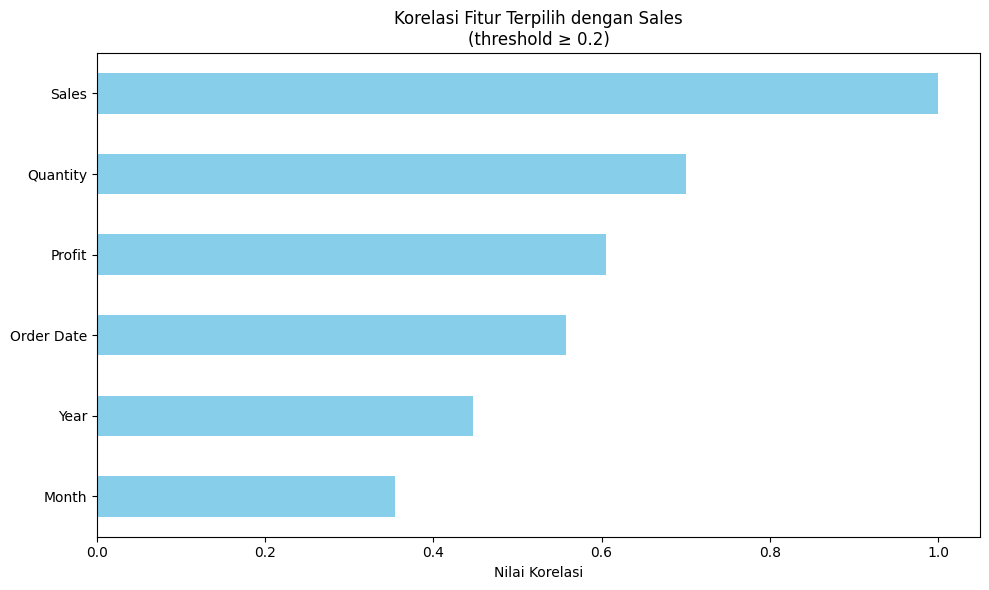


Statistik Deskriptif Fitur Terpilih:
--------------------------------------------------
       Quantity   Profit                     Order Date      Year    Month
count   622.000  622.000                            622   622.000  622.000
mean     24.116   75.130  2020-01-07 21:27:12.154340864  2019.498    6.777
min       1.000  -74.722            2019-01-01 00:00:00  2019.000    1.000
25%      10.000   18.360            2019-07-08 06:00:00  2019.000    4.000
50%      19.000   59.789            2019-12-30 12:00:00  2019.000    7.000
75%      33.750  110.064            2020-07-12 18:00:00  2020.000   10.000
max     122.000  528.582            2020-12-30 00:00:00  2020.000   12.000
std      18.878   77.130                            NaN     0.500    3.383


In [5]:
# Analisis Korelasi dengan Target Variable
def select_features_by_correlation(df, target_col, threshold=0.2):
    # Hitung matrix korelasi
    correlation_matrix = df.corr()

    # Ambil korelasi dengan target
    correlations_with_target = correlation_matrix[target_col].drop(target_col)

    # Pilih fitur berdasarkan threshold
    selected_features = correlations_with_target[
        abs(correlations_with_target) >= threshold
    ].sort_values(ascending=False)

    # Tampilkan hasil seleksi fitur
    print(f"\nHasil Analisis Korelasi (threshold ≥ {threshold}):")
    print("-" * 50)
    print("\nFitur Terpilih dan Nilai Korelasinya:")
    for feature, corr in selected_features.items():
        print(f"- {feature}: {corr:.3f}")

    print(f"\nTotal fitur terpilih: {len(selected_features)}")

    # Buat dataset baru dengan fitur terpilih
    X_selected = df[selected_features.index]
    y = df[target_col]

    return selected_features.index.tolist(), X_selected, y

# Implementasi Seleksi Fitur
# Tentukan parameter
TARGET_COLUMN = 'Sales'
CORRELATION_THRESHOLD = 0.2

# Jalankan seleksi fitur
selected_features, X_selected, y = select_features_by_correlation(
    df=df_final,
    target_col=TARGET_COLUMN,
    threshold=CORRELATION_THRESHOLD
)

# Visualisasi Korelasi Fitur Terpilih
plt.figure(figsize=(10, 6))
correlation_selected = df_final[selected_features + [TARGET_COLUMN]].corr()[TARGET_COLUMN].sort_values(ascending=True)
correlation_selected.plot(kind='barh', color='skyblue')
plt.title(f'Korelasi Fitur Terpilih dengan {TARGET_COLUMN}\n(threshold ≥ {CORRELATION_THRESHOLD})')
plt.xlabel('Nilai Korelasi')
plt.tight_layout()
plt.show()

# Statistik Deskriptif Fitur Terpilih
print("\nStatistik Deskriptif Fitur Terpilih:")
print("-" * 50)
print(X_selected.describe().round(3))

Hasil analisis pemilihan fitur berdasarkan korelasi dengan target Sales menunjukkan fitur-fitur yang memiliki hubungan cukup kuat dengan nilai korelasi minimal 0.2, baik positif maupun negatif. Fitur-fitur yang lolos seleksi ditampilkan beserta nilai korelasinya, yang memberi gambaran tentang seberapa besar pengaruhnya terhadap Sales. Semakin tinggi nilai absolut korelasi, semakin relevan fitur tersebut. Selain itu, hasil seleksi divisualisasikan dalam bentuk bar chart untuk memperjelas perbandingan korelasi antar fitur dengan target. Statistik deskriptif fitur-fitur terpilih juga ditampilkan, mencakup nilai rata-rata, standar deviasi, nilai minimum, dan maksimum.

# Pembagian Data

Kode ini menyiapkan data untuk model dengan memilih fitur, mengubah tanggal jadi jumlah hari sejak pemesanan pertama, lalu menstandarisasi data agar skala lebih seragam. Setelah itu, dataset dibagi jadi training (80%) dan testing (20%). Hasilnya ditampilkan, termasuk jumlah sampel, fitur, serta statistik dasar variabel target. Di akhir, daftar fitur yang digunakan juga dicetak.

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_dataset(df, feature_columns, target_column, test_size=0.2, random_state=42):
    # Seleksi fitur dan target
    X = df[feature_columns].copy()
    y = df[target_column].values

    # Preprocessing untuk kolom tanggal
    if 'Order Date' in X.columns:
        X['Days_Since_First_Order'] = (X['Order Date'] - X['Order Date'].min()).dt.days
        X = X.drop('Order Date', axis=1)

    # Standardisasi fitur numerik
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled,
        y,
        test_size=test_size,
        random_state=random_state
    )

    print("\nInformasi Dataset:")
    print("-" * 50)
    print(f"Total sampel: {len(df)}")
    print(f"Jumlah fitur: {X.shape[1]}")
    print(f"\nUkuran dataset:")
    print(f"Training set   : {X_train.shape} samples")
    print(f"Testing set    : {X_test.shape} samples")

    # statistik dasar
    print("\nStatistik Target Variable:")
    print("-" * 50)
    print(f"Mean   : {y.mean():.2f}")
    print(f"Std    : {y.std():.2f}")
    print(f"Min    : {y.min():.2f}")
    print(f"Max    : {y.max():.2f}")

    return X_train, X_test, y_train, y_test, scaler

# Implementasi
selected_features = ['Order Date', 'Profit', 'Quantity', 'Month', 'Year']
target_column = 'Sales'

# Jalankan proses persiapan data
X_train, X_test, y_train, y_test, scaler = prepare_dataset(
    df=df_final,
    feature_columns=selected_features,
    target_column=target_column,
    test_size=0.2,
    random_state=42
)

# Simpan nama fitur untuk referensi
feature_names = [col for col in selected_features if col != 'Order Date'] + ['Days_Since_First_Order']

print("\nDaftar fitur yang digunakan:")
print("-" * 50)
for i, feature in enumerate(feature_names, 1):
    print(f"{i}. {feature}")


Informasi Dataset:
--------------------------------------------------
Total sampel: 622
Jumlah fitur: 5

Ukuran dataset:
Training set   : (497, 5) samples
Testing set    : (125, 5) samples

Statistik Target Variable:
--------------------------------------------------
Mean   : 851.39
Std    : 875.15
Min    : 4.67
Max    : 6661.93

Daftar fitur yang digunakan:
--------------------------------------------------
1. Profit
2. Quantity
3. Month
4. Year
5. Days_Since_First_Order


In [7]:
def analyze_data_transformation(df_original, df_aggregated):
    # Analisis jumlah baris
    print("\nAnalisis Transformasi Data:")
    print("-" * 50)
    print(f"Jumlah baris data original   : {len(df_original):,} baris")
    print(f"Jumlah baris setelah agregasi: {len(df_aggregated):,} baris")
    print(f"Reduksi data                 : {(1 - len(df_aggregated)/len(df_original))*100:.1f}%")

    # Analisis periode waktu
    date_range = df_original['Order Date'].agg(['min', 'max'])
    print(f"\nRentang Waktu Data:")
    print("-" * 50)
    print(f"Tanggal awal  : {date_range['min'].strftime('%d %B %Y')}")
    print(f"Tanggal akhir : {date_range['max'].strftime('%d %B %Y')}")
    print(f"Total hari    : {(date_range['max'] - date_range['min']).days + 1:,} hari")

    # Analisis transaksi per hari
    transactions_per_day = len(df_original) / len(df_aggregated)
    print(f"\nAnalisis Transaksi:")
    print("-" * 50)
    print(f"Rata-rata transaksi per hari: {transactions_per_day:.1f} transaksi")

    # Analisis nilai penjualan
    print(f"\nAnalisis Nilai Penjualan:")
    print("-" * 50)
    print(f"Total penjualan: ${df_original['Sales'].sum():,.2f}")
    print(f"Rata-rata penjualan per hari: ${df_aggregated['Sales'].mean():,.2f}")
    print(f"Rata-rata penjualan per transaksi: ${df_original['Sales'].mean():,.2f}")

# Implementasi analisis
analyze_data_transformation(df_cleaned, df_final)


Analisis Transformasi Data:
--------------------------------------------------
Jumlah baris data original   : 4,353 baris
Jumlah baris setelah agregasi: 622 baris
Reduksi data                 : 85.7%

Rentang Waktu Data:
--------------------------------------------------
Tanggal awal  : 01 January 2019
Tanggal akhir : 30 December 2020
Total hari    : 730 hari

Analisis Transaksi:
--------------------------------------------------
Rata-rata transaksi per hari: 7.0 transaksi

Analisis Nilai Penjualan:
--------------------------------------------------
Total penjualan: $529,562.87
Rata-rata penjualan per hari: $851.39
Rata-rata penjualan per transaksi: $121.65


Kode ini membandingkan jumlah data sebelum dan sesudah agregasi, menghitung persentase pengurangan, serta menampilkan rentang waktu data. Selain itu, dianalisis juga rata-rata transaksi per hari dan nilai penjualan, termasuk total, harian, dan per transaksi. Outputnya memberikan gambaran perubahan data setelah proses agregasi.

# Implementasi Model Adaline

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ====== Implementasi Model Adaline ======

def standardize_train(X_train):
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)
    X_train_scaled = (X_train - mean_train) / std_train
    return X_train_scaled, mean_train, std_train

def standardize_test(X_test, mean_train, std_train):
    X_test_scaled = (X_test - mean_train) / std_train
    return X_test_scaled

class AdalineGD:
    def __init__(self, eta=0.001, epochs=2000, tolerance=1e-4):
        self.eta = eta
        self.epochs = epochs
        self.tolerance = tolerance
        self.losses = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Termasuk bias

        for epoch in range(self.epochs):
            net_input = self.net_input(X)
            errors = y - net_input
            loss = (errors ** 2).mean() / 2
            self.losses.append(loss)

            # Update bobot
            self.weights[1:] += self.eta * X.T.dot(errors) / len(y)
            self.weights[0] += self.eta * errors.mean()

            # Early stopping
            if epoch > 0 and abs(self.losses[-2] - self.losses[-1]) < self.tolerance:
                print(f"Konvergen pada epoch {epoch}")
                break

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return self.net_input(X)

# Normalisasi data
print("Memulai normalisasi data...")
X_train_scaled, mean_train, std_train = standardize_train(X_train)
X_test_scaled = standardize_test(X_test, mean_train, std_train)
print("Normalisasi data selesai")

# Training model
print("\nMemulai training model...")
adaline = AdalineGD(eta=0.001, epochs=2000)
adaline.fit(X_train_scaled, y_train)
print("Training model selesai")

# Prediksi
y_pred = adaline.predict(X_test_scaled)

# Output hasil prediksi
print("\nHasil Prediksi (10 data pertama):")
print(y_pred[:10])  # Menampilkan 10 hasil prediksi pertama

# Output bobot akhir
print("\nBobot Akhir Model:")
print(adaline.weights)


Memulai normalisasi data...
Normalisasi data selesai

Memulai training model...
Training model selesai

Hasil Prediksi (10 data pertama):
[ 209.85192154  851.25881095   24.41359529 1103.48502567  548.9999758
  144.87553436  735.99822629   14.68135033  757.66608702 -100.00694713]

Bobot Akhir Model:
[744.01361853 216.16846368 358.12865503  50.66666434 174.13709473
 175.07937402]


Kode ini mengimplementasikan model Adaline dengan Gradient Descent, dimulai dari normalisasi data, pelatihan model, hingga prediksi. Setelah model selesai dilatih, hasil prediksi untuk 10 data pertama ditampilkan, diikuti dengan bobot akhir model yang menunjukkan seberapa besar pengaruh masing-masing fitur dalam menentukan hasil prediksi.

# Linear Regression & SGD Regressor

In [9]:
from sklearn.linear_model import LinearRegression, SGDRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluasi Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluasi SGD Regressor
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("Linear Regression:")
print(f"MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R² Score: {r2_lr:.4f}")

print("\nSGD Regressor:")
print(f"MSE: {mse_sgd:.4f}, RMSE: {rmse_sgd:.4f}, R² Score: {r2_sgd:.4f}")


Linear Regression:
MSE: 258845.9735, RMSE: 508.7691, R² Score: 0.6101

SGD Regressor:
MSE: 258509.7900, RMSE: 508.4386, R² Score: 0.6106


# Evaluasi Model

Mengevaluasi menggunakan Model Adaline


Hasil Evaluasi:
MSE: 254721.9029
RMSE: 504.6998
R² Score: 0.6163


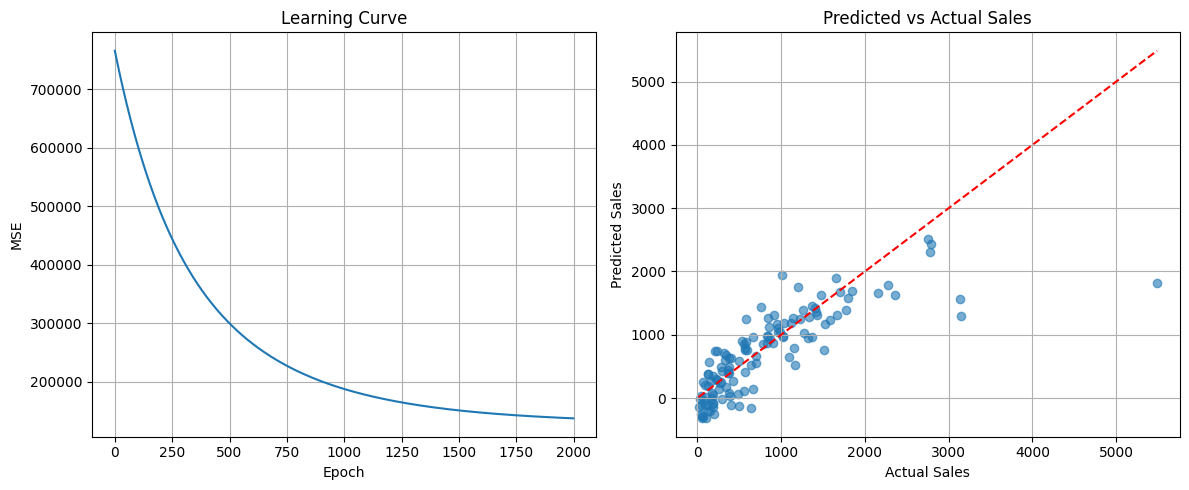

In [11]:
# Perhitungan metrik evaluasi
mse = ((y_test - y_pred) ** 2).mean()
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("\nHasil Evaluasi:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualisasi
plt.figure(figsize=(12, 5))

# Plot Learning Curve
plt.subplot(1, 2, 1)
plt.plot(adaline.losses)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)

# Plot Predictions vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.grid(True)


plt.tight_layout()
plt.show()

Hasil evaluasi mencakup MSE, RMSE, dan skor R² untuk mengukur akurasi model. Output visualisasi terdiri dari grafik learning curve yang menunjukkan perubahan error selama pelatihan dan grafik perbandingan hasil prediksi dengan nilai aktual. Jika model bekerja dengan baik, titik-titik pada grafik prediksi vs aktual akan mendekati garis diagonal merah.

# Visualisasi hasil prediksi dari semua model

In [15]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Inisialisasi model
adaline = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42)
linear_reg = LinearRegression()
sgd_reg = SGDRegressor(max_iter=1000, random_state=42)

# Melatih model
adaline.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)
sgd_reg.fit(X_train, y_train)

# Prediksi
y_pred_adaline = adaline.predict(X_test)
y_pred_linear = linear_reg.predict(X_test)
y_pred_sgd = sgd_reg.predict(X_test)

# Evaluasi MSE
mse_adaline = mean_squared_error(y_test, y_pred_adaline)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

# Menghitung RMSE (Root Mean Squared Error)
rmse_adaline = np.sqrt(mse_adaline)
rmse_linear = np.sqrt(mse_linear)
rmse_sgd = np.sqrt(mse_sgd)

# Evaluasi R²
r2_adaline = r2_score(y_test, y_pred_adaline)
r2_linear = r2_score(y_test, y_pred_linear)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Menampilkan hasil
print("Perbandingan Model:")
print(f"Adaline -> MSE: {mse_adaline:.4f}, RMSE: {rmse_adaline:.4f}, R² Score: {r2_adaline:.4f}")
print(f"Linear Regression -> MSE: {mse_linear:.4f}, RMSE: {rmse_linear:.4f}, R² Score: {r2_linear:.4f}")
print(f"SGD Regressor -> MSE: {mse_sgd:.4f}, RMSE: {rmse_sgd:.4f}, R² Score: {r2_sgd:.4f}")

Perbandingan Model:
Adaline -> MSE: 268535.4291, RMSE: 518.2040, R² Score: 0.5955
Linear Regression -> MSE: 258845.9735, RMSE: 508.7691, R² Score: 0.6101
SGD Regressor -> MSE: 258613.6148, RMSE: 508.5407, R² Score: 0.6105


    Actual  Adaline Predicted  Linear Regression Predicted  \
0   88.022         281.274532                   293.897827   
1  558.190         969.669994                   957.901270   
2  391.930          16.158522                    26.973107   
3  963.266        1265.295258                  1188.115129   
4  697.148         815.099428                   767.808408   
5  259.806         140.552881                   138.046920   
6  238.622         924.636740                   889.355681   
7   99.136          -0.734223                    23.465783   
8  570.214         830.366487                   818.730009   
9  191.880         -45.654859                   -17.137136   

   SGD Regressor Predicted  
0               285.344593  
1               939.921887  
2                10.049087  
3              1171.470153  
4               760.967939  
5               142.206427  
6               867.565869  
7                 9.393744  
8               829.620885  
9               -34.512323 

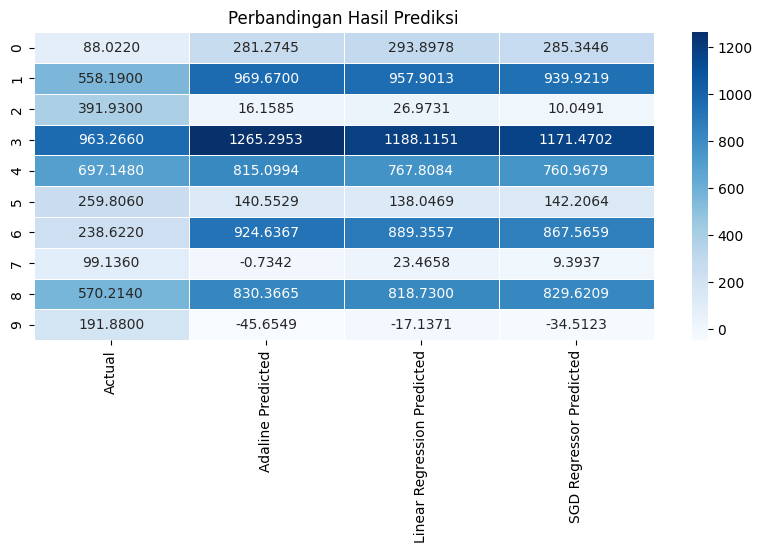

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat DataFrame untuk perbandingan hasil prediksi
comparison_df = pd.DataFrame({
    "Actual": y_test,  
    "Adaline Predicted": y_pred_adaline,
    "Linear Regression Predicted": y_pred_lr,
    "SGD Regressor Predicted": y_pred_sgd
})

# Menampilkan 10 hasil pertama sebagai tabel
print(comparison_df.head(10))

# Visualisasi tabel
plt.figure(figsize=(10, 4))
sns.heatmap(comparison_df.head(10), annot=True, fmt=".4f", cmap="Blues", linewidths=0.5)
plt.title("Perbandingan Hasil Prediksi")
plt.show()
